In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pwd

'/content'

In [4]:
#csv 파일에서 데이터 불러오기 1

filename1 = '/content/drive/My Drive/KoBERT/data/csv/emotion7.csv'
#filename2 = '/content/drive/My Drive/KoBERT/data/csv/emotion7_2.csv' #대화형
filename3 = '/content/drive/My Drive/KoBERT/data/csv/emotion7_3.csv'

emotion1 = pd.read_csv(filename1, encoding='cp949')
#emotion2 = pd.read_csv(filename2, encoding='UTF')
emotion3 = pd.read_csv(filename3, encoding='UTF')


FileNotFoundError: ignored

In [ ]:
#단발성 + 대화형
#emotion7 = pd.concat([emotion1, emotion2], ignore_index = True)
#emotion7 = pd.concat([emotion7, emotion3], ignore_index = True)

#단발성
emotion7 = pd.concat([emotion1, emotion3], ignore_index = True)

emotion7

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,그냥 내 느낌일뿐겠지?,공포
2,아직너무초기라서 그런거죠?,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포
...,...,...
62512,눈매가 너무 지저분해 옷을 갈아 입으면 옷을 여기저기 막 걸쳐놓고 음식을 먹으면 투...,분노
62513,룸메랑 요즘 자주 싸우게 돼,분노
62514,룸메와 너무 자주 싸우게 돼,분노
62515,우리 아빠가 어제 또 다쳤어,분노


In [ ]:
emotion7 = emotion7[(emotion7["Emotion"] == "슬픔") | (emotion7["Emotion"] == "분노")| (emotion7["Emotion"] == "공포")]
emotion7 = emotion7.sample(frac=1).reset_index(drop=True)  # shuffling하고 index reset
emotion7

,Sentence,Emotion
0,이제 두 달 다 돼가\\n 그런데 있는게 너무 힘들어,슬픔
1,안 먹었지,슬픔
2,민영화해라!,분노
3,어떻게 해야하죠?,공포
4,너의 말대로 가끔씩 산책을 해서 기분 전환을 하는 것도 도움이 될 거 같아,슬픔
...,...,...
38041,하 제가왜이러는지모르겠네요,슬픔
38042,범죄를 조장하네 진짜!!!!,분노
38043,그냥 옮겨라.우라질!!!!!,분노
38044,재꿈은 광고디자이너입니다하지만 정말고민인것은 재실력이 형편이없습니다.....,슬픔


In [ ]:
# y 값 정수화 (감정 0~6)
category = []
encoder = LabelEncoder()
for i in emotion7.Emotion:
  category.append(i)

encoder.fit(category)
category_label = encoder.transform(category)
print(type(category_label))
print(category_label.shape)
emotion7['Label'] = category_label 
emotion7

<class 'numpy.ndarray'>
(38046,)


,Sentence,Emotion,Label
0,이제 두 달 다 돼가\\n 그런데 있는게 너무 힘들어,슬픔,2
1,안 먹었지,슬픔,2
2,민영화해라!,분노,1
3,어떻게 해야하죠?,공포,0
4,너의 말대로 가끔씩 산책을 해서 기분 전환을 하는 것도 도움이 될 거 같아,슬픔,2
...,...,...,...
38041,하 제가왜이러는지모르겠네요,슬픔,2
38042,범죄를 조장하네 진짜!!!!,분노,1
38043,그냥 옮겨라.우라질!!!!!,분노,1
38044,재꿈은 광고디자이너입니다하지만 정말고민인것은 재실력이 형편이없습니다.....,슬픔,2


In [ ]:
emotion7["id"] = emotion7.index
emotion7['document'] = emotion7['Sentence']
emotion7['label'] = emotion7['Label']
emotion7 = emotion7.drop(['Sentence', 'Emotion', 'Label'], axis=1)
emotion7

,id,document,label
0,0,이제 두 달 다 돼가\\n 그런데 있는게 너무 힘들어,2
1,1,안 먹었지,2
2,2,민영화해라!,1
3,3,어떻게 해야하죠?,0
4,4,너의 말대로 가끔씩 산책을 해서 기분 전환을 하는 것도 도움이 될 거 같아,2
...,...,...,...
38041,38041,하 제가왜이러는지모르겠네요,2
38042,38042,범죄를 조장하네 진짜!!!!,1
38043,38043,그냥 옮겨라.우라질!!!!!,1
38044,38044,재꿈은 광고디자이너입니다하지만 정말고민인것은 재실력이 형편이없습니다.....,2


In [ ]:
emotion7 = emotion7.sample(frac=1)  # row 전체 shuffle
emotion7 = emotion7.sample(frac=1).reset_index(drop=True)  # shuffling하고 index reset
emotion7

,id,document,label
0,6669,그냐여자가 쪽지로 친하게지내고싶다이런식으로 전달한다면거부반응 느낄까요??,0
1,23025,닭년이 조언 구했다고 했는데 먼개소리냐,1
2,33273,화내 받지,1
3,27423,어 그래 고마워,0
4,5284,들통날 거짓말을 뭘 그리 짜증내면서 하셨을까..,1
...,...,...,...
38041,25958,루리웹을 접어야할까요,0
38042,14952,나 결국 그 사람과 헤어졌어,2
38043,2686,너무 무섭습니다.0,0
38044,13737,진짜 이직이라도 해야 되나,1


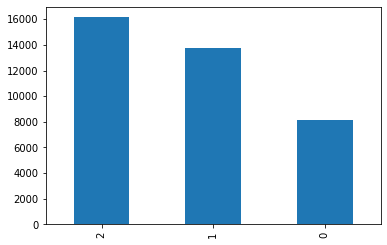

In [ ]:
emotion7['label'].value_counts().plot(kind = 'bar')

In [ ]:
setLen = int(len(emotion7)*0.8)

train = emotion7[:setLen]
test = emotion7[setLen:]

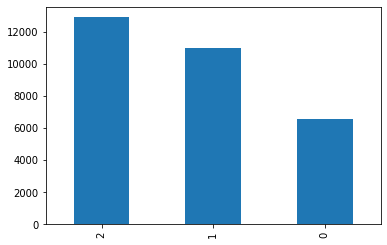

In [ ]:
train['label'].value_counts().plot(kind = 'bar')

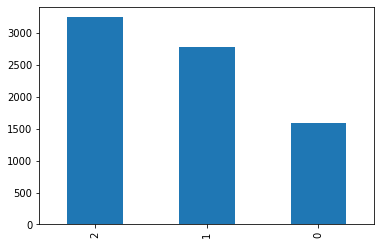

In [ ]:
test['label'].value_counts().plot(kind = 'bar')

In [ ]:
train_ = train.copy()
test_ = test.copy()

In [ ]:
train_['document'] = train['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [ ]:
test_['document'] = test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [ ]:
train_.to_csv('ratings_train.txt', sep = '\t', index = False)

In [ ]:
test_.to_csv('ratings_test.txt', sep = '\t', index = False)